In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
# Importing the required packages
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier


# Dataset

In [2]:
train_data=pd.read_csv("pendigits-tra.csv",header=None)
test_data=pd.read_csv("pendigits-tes.csv",header=None)

In [3]:
X_train=train_data.iloc[:,:-1]
y_train=train_data.iloc[:,-1]

In [4]:
X_test=test_data.iloc[:,:-1]
y_test=test_data.iloc[:,-1]

#Accuracies function

In [5]:
def get_accuracies(y_actual, y_predict):
  from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
  print('\nClassification Report:\n')
  print(classification_report(y_actual, y_predict))
  cm = confusion_matrix(y_actual, y_predict)
  print('\nAccuracy Score:\n')
  print(accuracy_score(y_actual, y_predict))
  print('\Confusion Matrix Display:\n')
  print(ConfusionMatrixDisplay(cm).plot())

In [6]:
def get_predect(pip,Xtrain,Xtest, ytrain,y):
  pip.fit(Xtrain.values, ytrain.values)

# Predicting the Test set results
  y_pred = pip.predict(Xtest.values)
  acc=accuracy_score(y, y_pred)*100
  print( acc)
  return y_pred,acc

# Decision Tree


Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       363
           1       0.85      0.87      0.86       364
           2       0.86      0.95      0.90       364
           3       0.88      0.93      0.90       336
           4       0.92      0.96      0.94       364
           5       0.94      0.85      0.89       335
           6       0.98      0.94      0.96       336
           7       0.91      0.85      0.88       364
           8       0.94      0.95      0.95       336
           9       0.95      0.92      0.93       336

    accuracy                           0.92      3498
   macro avg       0.92      0.92      0.92      3498
weighted avg       0.92      0.92      0.92      3498


Accuracy Score:

0.9159519725557461
\Confusion Matrix Display:



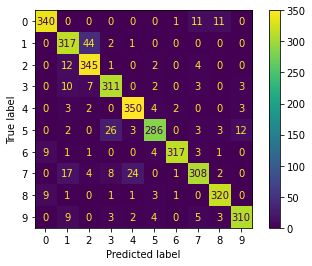

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

estimator = DecisionTreeClassifier(random_state=2022)
estimator.fit(X_train, y_train)
DTy_pred = estimator.predict(X_test)
report = get_accuracies(y_test, DTy_pred)


# Bagging using SVM 

In [8]:
bag_clf = BaggingClassifier(SVC(), n_estimators=500,bootstrap=True, n_jobs=-1, oob_score=True, random_state=2022)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_


0.9958633573525487


Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       363
           1       0.96      0.96      0.96       364
           2       0.96      0.99      0.98       364
           3       0.99      0.99      0.99       336
           4       1.00      0.99      0.99       364
           5       0.98      0.98      0.98       335
           6       1.00      1.00      1.00       336
           7       0.99      0.95      0.97       364
           8       0.97      1.00      0.98       336
           9       0.98      0.99      0.98       336

    accuracy                           0.98      3498
   macro avg       0.98      0.98      0.98      3498
weighted avg       0.98      0.98      0.98      3498


Accuracy Score:

0.9811320754716981
\Confusion Matrix Display:



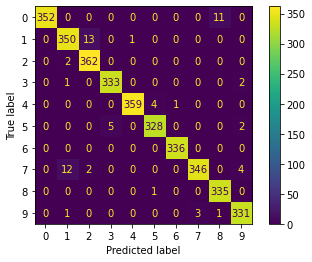

In [9]:
y_pred = bag_clf.predict(X_test)
get_accuracies(y_test, y_pred)


# Bagging using decision tree

In [10]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,bootstrap=True, n_jobs=-1, oob_score=True, random_state=2022)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_


0.9834534294101949


Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       363
           1       0.88      0.93      0.90       364
           2       0.93      0.98      0.95       364
           3       0.96      0.98      0.97       336
           4       0.96      0.98      0.97       364
           5       0.97      0.90      0.93       335
           6       0.98      0.98      0.98       336
           7       0.98      0.90      0.94       364
           8       0.94      0.98      0.96       336
           9       0.96      0.95      0.96       336

    accuracy                           0.95      3498
   macro avg       0.95      0.95      0.95      3498
weighted avg       0.95      0.95      0.95      3498


Accuracy Score:

0.9531160663236135
\Confusion Matrix Display:



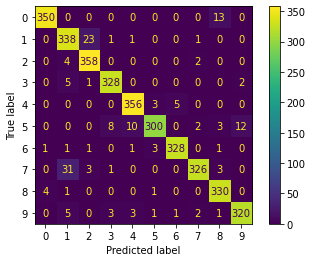

In [11]:
y_pred = bag_clf.predict(X_test)
get_accuracies(y_test, y_pred)


In [12]:
estimators=[100,200,250,300,450]
accuracy=[]
for i in estimators:
  bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=i,bootstrap=True, n_jobs=-1, oob_score=True, random_state=2022)
  bag_clf.fit(X_train, y_train)
  y_pred = bag_clf.predict(X_test)
  accuracy.append(accuracy_score(y_test, y_pred))

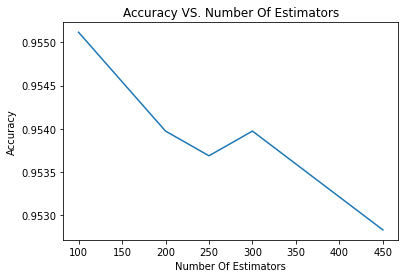

In [13]:
plt.plot(estimators,accuracy)
plt.xlabel('Number Of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy VS. Number Of Estimators')
plt.show()


# Boosting


In [14]:
n_estimators=[50,100,150,200]
accn=[]
yperdes=[]
for n in n_estimators:
  model = GradientBoostingClassifier(n_estimators=n)
  y_pred,acc=get_predect(model,X_train, X_test, y_train, y_test)
  accn.append(acc)
  yperdes.append(y_pred)


95.02572898799315
96.25500285877644
96.1978273299028
96.25500285877644


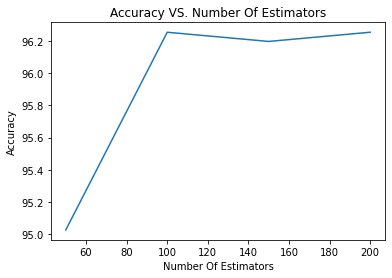

In [15]:
plt.plot(n_estimators,accn)
plt.xlabel('Number Of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy VS. Number Of Estimators')
plt.show()

96.25500285877644

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.94      0.97       363
           1       0.90      0.94      0.92       364
           2       0.94      0.99      0.96       364
           3       0.97      0.99      0.98       336
           4       1.00      1.00      1.00       364
           5       0.99      0.92      0.96       335
           6       1.00      0.99      1.00       336
           7       0.99      0.90      0.94       364
           8       0.93      1.00      0.96       336
           9       0.93      0.96      0.95       336

    accuracy                           0.96      3498
   macro avg       0.96      0.96      0.96      3498
weighted avg       0.96      0.96      0.96      3498


Accuracy Score:

0.9625500285877644
\Confusion Matrix Display:



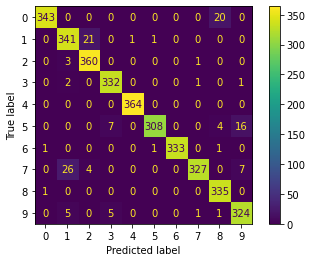

In [16]:
model = GradientBoostingClassifier(n_estimators=200)
y_pred,acc=get_predect(model,X_train, X_test, y_train, y_test)
get_accuracies(y_test, y_pred)


In [17]:
LR=[.1,.5,.7,.9]
acclr=[]
yperdeslr=[]

for n in LR:
  model = GradientBoostingClassifier(n_estimators=200,learning_rate=n)
  y_pred,acc=get_predect(model,X_train, X_test, y_train, y_test)
  acclr.append(acc)
  yperdeslr.append(y_pred)

96.25500285877644
96.28359062321327
8.947970268724987
69.23956546598056


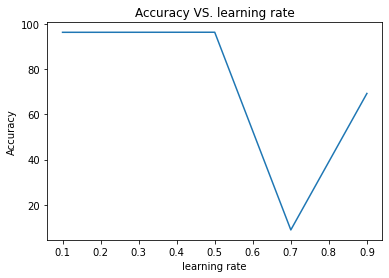

In [18]:
plt.plot(LR,acclr)
plt.xlabel('learning rate')
plt.ylabel('Accuracy')
plt.title('Accuracy VS. learning rate')
plt.show()

96.28359062321327

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       363
           1       0.88      0.95      0.92       364
           2       0.95      0.99      0.97       364
           3       0.97      0.99      0.98       336
           4       1.00      1.00      1.00       364
           5       0.99      0.90      0.94       335
           6       1.00      1.00      1.00       336
           7       0.99      0.89      0.94       364
           8       0.93      1.00      0.96       336
           9       0.93      0.97      0.95       336

    accuracy                           0.96      3498
   macro avg       0.96      0.96      0.96      3498
weighted avg       0.96      0.96      0.96      3498


Accuracy Score:

0.9628359062321327
\Confusion Matrix Display:



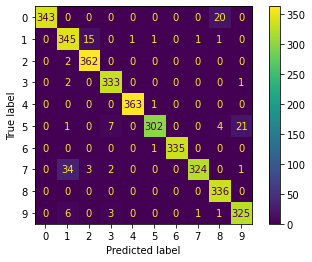

In [19]:
model = GradientBoostingClassifier(n_estimators=200,learning_rate=.5)
y_pred,acc=get_predect(model,X_train, X_test, y_train, y_test)
get_accuracies(y_test, y_pred)


C:\Users\Owner\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:41:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
96.28359062321327

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.94      0.97       363
           1       0.92      0.94      0.93       364
           2       0.94      0.99      0.96       364
           3       0.96      0.99      0.98       336
           4       0.96      0.99      0.98       364
           5       0.99      0.95      0.97       335
           6       0.99      0.99      0.99       336
           7       0.98      0.89      0.93       364
           8       0.94      0.99      0.96       336
           9       0.97      0.96      0.97       336

    accuracy                           0.96      3

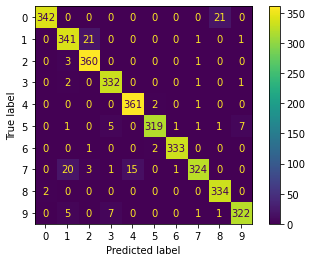

In [20]:
from xgboost import XGBClassifier
xgboost = XGBClassifier(n_estimators = 200, learning_rate = 0.5)
y_pred,acc=get_predect(xgboost,X_train, X_test, y_train, y_test)
get_accuracies(y_test, y_pred)